This programming exercise is from the textbook [Think Complexity, 2nd edition](https://thinkcomplex.com) by Allen Downey. This book is distributed under the [MIT License](http://opensource.org/licenses/MIT).

Some computer code from the textbook were also reused and modified for the purposes of this exercise. These reused computer code are indicated in the solution for this exercise and are still credited to the author.

**Exercise:** In a ring lattice, every node has the same number of neighbors.  The number of neighbors is called the **degree** of the node, and a graph where all nodes have the same degree is called a **regular graph**.

All ring lattices are regular, but not all regular graphs are ring lattices.  In particular, if `k` is odd, we can't construct a ring lattice, but we might be able to construct a regular graph.

Write a function called `make_regular_graph` that takes `n` and `k` and returns a regular graph that contains `n` nodes, where every node has `k` neighbors.  If it's not possible to make a regular graph with the given values of `n` and `k`, the function should raise a `ValueError`.

# Solution goes here

As required in the exercise, the function `make_regular_graph` allows regular graphs to be made even if `k` is odd. Most of the functionality however is provided by the function `adjacent_edges` from the textbook which was modified to allow `k` to be odd and for an error to be raised whenever a graph cannot be made from the values of `n` and `k`.

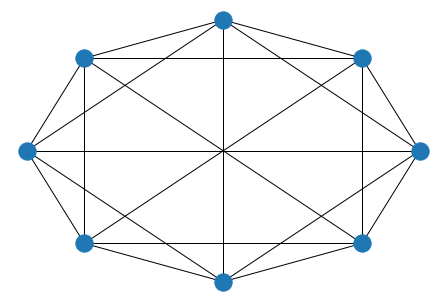

In [5]:
import networkx as nx

"""
This generates a regular graph with n nodes and k neighbors per node.

Mathematically, a graph cannot be generated when n is odd and k is odd

All the magic happens in the modified adjacent_edges

Lastly, not using nx.draw_circular allows weird-looking graphs to be generated
"""

def adjacent_edges(nodes, k):
    n = len(nodes)
    
    if k%2 != 0 and n%2 != 0:                                   # Checks if n is odd and k is odd
        raise ValueError('k cannot be odd when n is odd')       # Raises the value error
    
    else:
        if k % 2 == 0:                                          # This part is similar to the one in the book
            k = k//2
            
            for i in range(n):
                for j in range(i+1, i+k+1):
                    yield nodes[i], nodes[j%n]                  # Except that it uses the actual values of the nodes
                
        else:                                                   # Runs this part if k is odd
            k = (k-1) // 2                                      # Turns odd k into even k and repeats the above code

            for i in range(n):
                for j in range(i+1-k, i+k+1):
                    yield nodes[i], nodes[j%n]
                
                yield nodes[i], nodes[(i+n//2)%n]               # This adds an edge to the opposite node

def make_regular_graph(node, k):
    G = nx.Graph()                                              # Creates the initial graph G
    
    G.add_nodes_from(range(node))
    G.add_edges_from(adjacent_edges(range(node),k))             # Runs the adjacent_edges function
    
    return G

#nx.draw(make_regular_graph(8, 4))                              # Note that this could generate non-circular graphs
nx.draw_circular(make_regular_graph(8, 5))                      # Use this to make non-weird graphs